In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
import statsmodels.api as sm

from copy import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_FPKMS = pd.read_csv("all_annotated.csv")
df_FPKMS

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


# Clustering

In [3]:
#filter for median>0
roi_med = df_FPKMS.iloc[:,2:].median(axis=1) > 0
df_FPKMS_filtered = df_FPKMS.loc[roi_med,:]
df_FPKMS_filtered

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [4]:
#Convert to log2 values
df_FPKMS_log2 = np.log2(df_FPKMS_filtered.iloc[:,2:]+0.1)
df_FPKMS_log2

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [5]:
#Cluster by samples and genes
link_mat_row = linkage(df_FPKMS_log2)
link_mat_col = linkage(df_FPKMS_log2.T)

gene_clusters = leaves_list(link_mat_row)
sample_clusters = leaves_list(link_mat_col)

In [6]:
df_FPKMS_cluster = df_FPKMS_log2.iloc[gene_clusters, sample_clusters]
df_FPKMS_cluster

,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
10838,11.627885,-3.321928,6.513012,9.770807,9.915343,10.594618,9.674967,10.186101,9.669459,11.041927,9.911055,10.533361,-3.321928,10.362427,10.730739,9.153596
1771,-3.321928,-3.321928,6.690422,-3.321928,-3.321928,6.329519,4.495864,-3.321928,6.838377,-3.321928,5.681848,6.306998,-3.321928,5.834810,5.910958,5.848470
15545,-3.321928,-3.321928,-3.321928,-3.321928,7.333518,-3.321928,-3.321928,7.029427,6.888902,-3.321928,6.486714,-3.321928,6.008203,6.116518,6.332019,6.112357
1772,11.891232,-3.321928,11.521811,11.715662,11.456581,10.977238,9.584416,11.426619,11.347327,11.210067,9.876014,10.903922,10.592872,10.616585,10.723743,10.790580
14830,-3.321928,4.011398,7.226825,6.482741,4.775450,-3.321928,-3.321928,-3.321928,4.906105,6.536656,5.750684,6.886073,4.165947,5.608112,-3.321928,3.429699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,-3.321928,1.510554,-3.321928,-3.321928,0.565386,2.556431,4.215109,3.022511,2.514033,2.975323,4.404787,2.796918,3.743997,3.697081,3.753138,4.144922
23804,-3.321928,1.904281,-3.321928,-3.321928,2.203526,3.742785,4.456723,3.133134,3.082398,3.918539,3.644903,2.515062,4.032783,3.928964,2.938631,4.015114
22645,-3.321928,1.252376,-3.321928,-3.321928,4.190093,5.551469,3.595382,4.846243,5.205921,3.524966,4.244179,4.142772,2.719274,3.654464,5.371957,4.159932
10127,-3.321928,2.108582,-3.321928,-3.321928,4.012782,4.259026,3.734655,3.798314,4.623693,4.782553,4.118265,4.292943,4.214183,3.354926,3.554976,3.861936


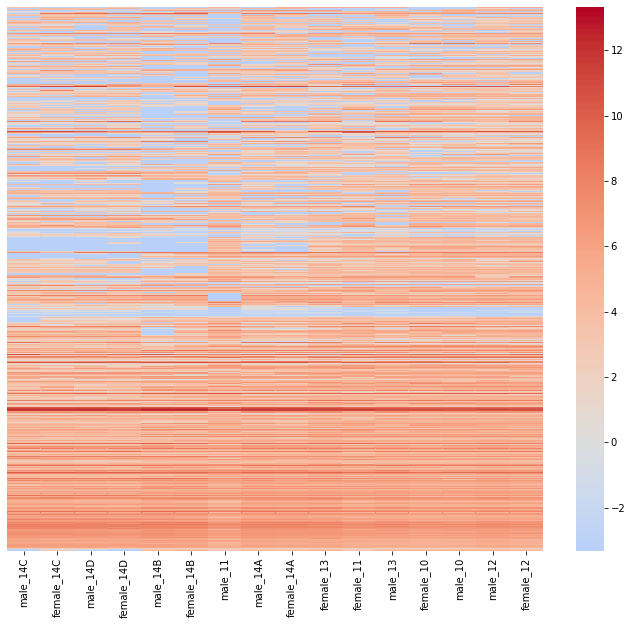

In [7]:
#Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(df_FPKMS_cluster, cmap = "coolwarm", center = 0, yticklabels = False)
plt.show()

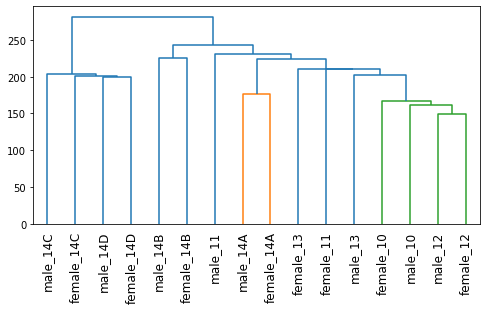

In [8]:
#Dendrogram
plt.figure(figsize = (8, 4))
dendrogram(link_mat_col, labels = df_FPKMS_log2.columns, leaf_rotation = 90)
plt.show()

# Differential expression

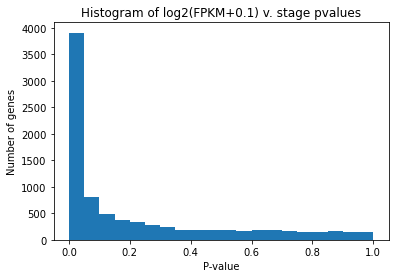

In [9]:
pvals = []
dev_stages = [10, 11, 12, 13, 14, 14, 14, 14, 
    10, 11, 12, 13, 14, 14, 14, 14]

for index, FPKMS in df_FPKMS_log2.iterrows():
    x = sm.add_constant(dev_stages)
    y = FPKMS[:16]
    
    linreg = sm.OLS(y, x).fit()
    pval = linreg.pvalues[1]
    pvals.append(pval)
    
fig, ax = plt.subplots()
ax.hist(pvals, bins = 20)

ax.set_title("Histogram of log2(FPKM+0.1) v. stage pvalues")
ax.set_xlabel("P-value")
ax.set_ylabel("Number of genes")

plt.show()

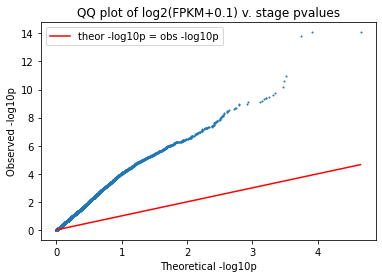

In [10]:
p_theor = []
p_obs = []

for pval in pvals:
    p_theor.append(-np.log10(np.random.random_sample()))
    p_obs.append(-np.log10(pval))

p_theor.sort()
p_obs.sort()

fig, ax = plt.subplots()
ax.scatter(p_theor, p_obs, s = 1)
ax.plot(p_theor, p_theor, color = "red", label = "theor -log10p = obs -log10p")

ax.set_title("QQ plot of log2(FPKM+0.1) v. stage pvalues")
ax.set_ylabel("Observed -log10p")
ax.set_xlabel("Theoretical -log10p")
ax.legend()

plt.show()

In [11]:
#Obtain pval for FDR
pvals_ranked = copy(pvals)
pvals_ranked.sort()

def FDR(pvals, Q):
    m = len(pvals_ranked)
    p_fdr = 0 

    for i in range(1, m+1):
        crit_val = i/m * Q
    
        if pvals[i-1] < crit_val:
            p_fdr = pvals[i-1]
        else:
            break
            
    return p_fdr

p_fdr10 = FDR(pvals_ranked, 0.1)
p_fdr10

0.04393410973189462

In [12]:
df_FPKMS_log2["pval"] = pvals
df_FPKMS_log2

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,pval
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.735893
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.162378
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.263080
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.031521
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.221445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.049018
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.051185
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.546605
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.170680


In [13]:
roi = df_FPKMS_log2.loc[:,"pval"] < p_fdr10
roi

3        False
8        False
9        False
10        True
11       False
         ...  
34663    False
34665    False
34667    False
34684    False
34715    False
Name: pval, Length: 8613, dtype: bool

In [14]:
gene_list = df_FPKMS_filtered.loc[roi].iloc[:,1]
gene_list = list(gene_list.unique())
gene_list

['Tim17b',
 'CG41128',
 'CG12581',
 'CG14641',
 'abs',
 'Vps24',
 'CG9776',
 'hkb',
 'CG11739',
 'CG9855',
 'CG14647',
 'lost',
 'srl',
 'eIF3-S10',
 'CG31523',
 'CG14651',
 'Fip1',
 'CG9775',
 'rpk',
 'CG9769',
 'tacc',
 'atms',
 'Hus1-like',
 'Gnf1',
 'corto',
 'CG12163',
 'CG12173',
 'Hph',
 'CR45033',
 'Prosbeta7',
 'RpII18',
 'CG14667',
 'PEK',
 'Snr1',
 'Hdac3',
 'CG45100',
 'ksr',
 'CG31550',
 'CG2519',
 'Pcmt',
 'Snm1',
 'rev7',
 'noi',
 'kra',
 'Atu',
 'CG2911',
 'RpL13A',
 'snoRNA:Me28S-U2134a',
 'CG31551',
 'CG31549',
 'CG31546',
 'CG31548',
 'MED27',
 'Rab23',
 'CG2100',
 'Madm',
 'CG2091',
 'CG2051',
 'Rpn5',
 'CG1218',
 'CG10979',
 'Hpr1',
 'CG2023',
 'SmD2',
 'CG18048',
 'CG42724',
 'TfIIFalpha',
 'Dmtn',
 'CG1307',
 'zen2',
 'zen',
 'bcd',
 'CR45593',
 'CR44930',
 'ftz',
 'CR44931',
 'CR45559',
 'CG1943',
 'Ref1',
 'Dpck',
 'alphaTub84B',
 'CG10068',
 'MAGE',
 'CG10055',
 'CG1234',
 'CG10053',
 'CG1142',
 'scaRNA:MeU5-C46',
 'alphaTub84D',
 'alpha-Est5',
 'sgll',
 'mRpS

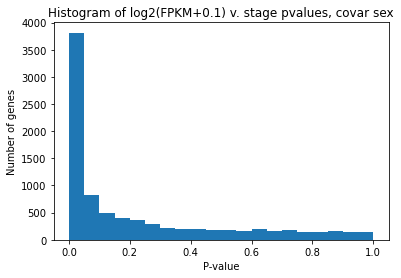

In [16]:
pvals_sex = []
betas_sex = []

#male = 0, female = 1
dev_sex = [[10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [14, 0], [14, 0], [14, 0],
           [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [14, 1], [14, 1], [14, 1]]

for index, FPKMS in df_FPKMS_log2.iterrows():
    x = sm.add_constant(dev_sex)
    y = FPKMS[:16]
    
    linreg = sm.OLS(y, x).fit()
    pval = linreg.pvalues[1]
    beta = linreg.params[1]
    pvals_sex.append(pval)
    betas_sex.append(beta)
    
fig, ax = plt.subplots()
ax.hist(pvals_sex, bins = 20)

ax.set_title("Histogram of log2(FPKM+0.1) v. stage pvalues, covar sex")
ax.set_xlabel("P-value")
ax.set_ylabel("Number of genes")

plt.show()

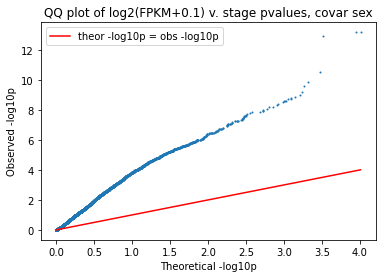

In [17]:
p_theor = []
p_obs = []

for pval in pvals_sex:
    p_theor.append(-np.log10(np.random.random_sample()))
    p_obs.append(-np.log10(pval))

p_theor.sort()
p_obs.sort()

fig, ax = plt.subplots()
ax.scatter(p_theor, p_obs, s = 1)
ax.plot(p_theor, p_theor, color = "red", label = "theor -log10p = obs -log10p")

ax.set_title("QQ plot of log2(FPKM+0.1) v. stage pvalues, covar sex")
ax.set_ylabel("Observed -log10p")
ax.set_xlabel("Theoretical -log10p")
ax.legend()

plt.show()

In [18]:
pvals_sex_ranked = copy(pvals_sex)
pvals_sex_ranked.sort()

p_fdr10_sex = FDR(pvals_sex_ranked, 0.1)
p_fdr10_sex

0.04254756862410047

In [19]:
df_FPKMS_log2["pval_sex"] = pvals_sex
df_FPKMS_log2

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,pval,pval_sex
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,0.735893,0.745479
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,0.162378,0.174987
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,0.263080,0.274123
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,0.031521,0.018751
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,0.221445,0.227350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,0.049018,0.056993
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,0.051185,0.057250
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,0.546605,0.560402
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,0.170680,0.177894


In [21]:
roi_sex = df_FPKMS_log2.loc[:,"pval_sex"] < p_fdr10_sex
roi_sex

3        False
8        False
9        False
10        True
11       False
         ...  
34663    False
34665    False
34667    False
34684    False
34715    False
Name: pval_sex, Length: 8613, dtype: bool

In [22]:
gene_list_sex = df_FPKMS_filtered.loc[roi_sex].iloc[:,1]
gene_list_sex = list(gene_list_sex.unique())
gene_list_sex

['Tim17b',
 'CG41128',
 'CG12581',
 'CG14641',
 'abs',
 'Vps24',
 'CG9776',
 'hkb',
 'CG11739',
 'CG9855',
 'CG14647',
 'lost',
 'srl',
 'eIF3-S10',
 'CG31523',
 'CG14651',
 'Fip1',
 'CG9775',
 'rpk',
 'CG9769',
 'tacc',
 'atms',
 'Hus1-like',
 'Gnf1',
 'corto',
 'CG12163',
 'CG12173',
 'Hph',
 'CR45033',
 'Prosbeta7',
 'RpII18',
 'CG14667',
 'PEK',
 'Snr1',
 'Hdac3',
 'CG45100',
 'ksr',
 'CG31550',
 'Pcmt',
 'Snm1',
 'rev7',
 'noi',
 'kra',
 'Atu',
 'CG2911',
 'RpL13A',
 'snoRNA:Me28S-U2134a',
 'CG31551',
 'CG31549',
 'CG31546',
 'CG31548',
 'MED27',
 'Rab23',
 'CG2100',
 'Madm',
 'CG2091',
 'CG2051',
 'Rpn5',
 'CG1218',
 'CG10979',
 'Hpr1',
 'CG2023',
 'SmD2',
 'CG18048',
 'CG42724',
 'TfIIFalpha',
 'CG1307',
 'zen2',
 'zen',
 'bcd',
 'CR45593',
 'CR44930',
 'ftz',
 'CR44931',
 'CR45559',
 'CG1943',
 'Ref1',
 'Dpck',
 'alphaTub84B',
 'CG10068',
 'MAGE',
 'CG10055',
 'CG1234',
 'CG10053',
 'CG1142',
 'scaRNA:MeU5-C46',
 'alphaTub84D',
 'alpha-Est5',
 'sgll',
 'mRpS9',
 'lds',
 'CD98hc

In [23]:
print("Percent overlap with and without sex as covariate: ", len(gene_list_sex)/len(gene_list) * 100, "%")

Percent overlap with and without sex as covariate:  96.66553249404559 %


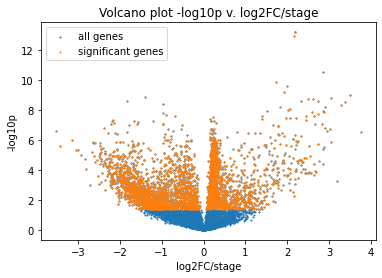

In [25]:
log10pvals_sex = []
betas_sig = []
log10pvals_sig = []

for i in range(len(pvals_sex)):
    log10pvals_sex.append(-np.log10(pvals_sex[i]))
    
    if pvals_sex[i] < p_fdr10_sex:
        betas_sig.append(betas_sex[i])
        log10pvals_sig.append(-np.log10(pvals_sex[i]))
        
fig, ax = plt.subplots()
ax.scatter(betas_sex, log10pvals_sex, s=1, label = "all genes")
ax.scatter(betas_sig, log10pvals_sig, s=1, label = "significant genes")

ax.set_title("Volcano plot -log10p v. log2FC/stage")
ax.set_xlabel("log2FC/stage")
ax.set_ylabel("-log10p")
ax.legend()
           
plt.show()